##Get coordinates


In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/data/

/content/drive/MyDrive/data


In [ ]:
df = pd.read_csv('Homicide-v4.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Death Date            2906 non-null   object
 1   Death Year            2906 non-null   int64 
 2   Victim Name           2906 non-null   object
 3   Death Location        2906 non-null   object
 4   Victim Age            2906 non-null   object
 5   Victim Gender         2906 non-null   object
 6   Cause of Death        2906 non-null   object
 7   Victim Race           2906 non-null   object
 8   Agency                2906 non-null   object
 9   If Officer Involved   2906 non-null   object
dtypes: int64(1), object(9)
memory usage: 227.2+ KB


In [ ]:
df.head()

,Death Date,Death Year,Victim Name,Death Location,Victim Age,Victim Gender,Cause of Death,Victim Race,Agency,If Officer Involved
0,Mar.21,2023,Jianwen Zheng,131 South 6Th Ave,42,Male,Unknown,Asian,LASD,Unknown
1,Mar.20,2023,Antione Deshawn Jones,413 East Avenue Q-7,35,Male,Unknown,Black,LASD,Unknown
2,Mar.17,2023,Kyle Mcarthur Jones,4410 S Figueroa St,48,Male,Unknown,Black,LAPD,Unknown
3,Mar.17,2023,Ernesto Ramirez Aceves,132Nd Street And Alameda,44,Male,Unknown,Latino,LASD,Unknown
4,Mar.16,2023,Jeffrey Zaffarullah Faiz,3644 Military Avenue,61,Male,Unknown,White,LAPD,Unknown


In [ ]:
address = list(df['Death Location'].unique())
len(address)

2726

In [ ]:
from bs4 import BeautifulSoup
import urllib.request as ur
import json
coordinate = []
num = []
nullAdd = []
adr = []
for i, a in enumerate(address):
    if i % 100 == 0:
        print(i)
    a_str = '+'.join(a.split())+'+CA+USA'
    # print(a_str)
    url = 'https://nominatim.openstreetmap.org/search?q={}&format=geojson'.format(a_str)
    # print(url)
    with ur.urlopen(url) as response:
        res = response.read()        
        res = BeautifulSoup(res)
        res = res.find('body').getText()
        try:
            data_dict = json.loads(res)
        except:
            nullAdd.append(i)
            num.append(0)
            adr.append('')
            coordinate.append('')
        else:
            if not len(data_dict["features"]):
                nullAdd.append(i)
                num.append(0)
                adr.append('')
                coordinate.append('')
            else:
                num.append(len(data_dict["features"]))
                adr.append(data_dict["features"][0]['properties']['display_name'])
                coordinate.append(tuple(data_dict["features"][0]["geometry"]["coordinates"]))

0


<ipython-input-7-8f3d3f644abb>:17: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  res = BeautifulSoup(res)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


In [ ]:
print(len(coordinate), len(nullAdd))

2726 926


In [ ]:
coordinate

[(-117.02087, 34.89833944897959),
 (-118.12250047058824, 34.581082823529414),
 (-118.28260259183673, 34.00356685714286),
 '',
 (-118.4162855831528, 34.0178282332285),
 (-118.22196546428572, 34.02681514285714),
 (-117.95387127625216, 34.002577158156356),
 (-118.25950942857142, 33.97019332653061),
 (-118.2653434, 33.9735424),
 (-118.5326634, 34.385779),
 (-118.56861971992849, 34.286424554671854),
 (-118.30345678787879, 33.990499303030305),
 '',
 (-118.2877298, 33.8905594),
 '',
 '',
 '',
 (-118.18637770588235, 34.062657617647055),
 (-122.33994921326465, 40.532686836187864),
 (-118.17346077472666, 34.080828477276256),
 (-117.70687, 34.063254),
 '',
 (-118.12199434494, 34.69686755977786),
 (-118.042202281535, 33.902369232430175),
 (-118.27414536734695, 34.05912714285714),
 '',
 '',
 (-118.26541258207011, 33.84487156928963),
 (-118.15244605916602, 33.883497),
 '',
 '',
 (-118.35107406345419, 33.92982485),
 (-118.29856867346939, 34.039139163265304),
 (-118.30901320408162, 34.00352504081633),

In [ ]:
location = pd.DataFrame({'address': address, 'coordinates': coordinate, 'numOfMatches': num, 'AddMatches': adr})
location.head()

,address,coordinates,numOfMatches,AddMatches
0,131 South 6Th Ave,"(-117.02087, 34.89833944897959)",4,"131, South 6th Avenue, Barstow, San Bernardino..."
1,413 East Avenue Q-7,"(-118.12250047058824, 34.581082823529414)",1,"413, East Avenue Q 7, Palmdale, Los Angeles Co..."
2,4410 S Figueroa St,"(-118.28260259183673, 34.00356685714286)",1,"4410, South Figueroa Street, South Park, Los A..."
3,132Nd Street And Alameda,,0,
4,3644 Military Avenue,"(-118.4162855831528, 34.0178282332285)",1,"3644, Military Avenue, Palms, Los Angeles, Los..."


In [ ]:
result = pd.merge(df, location, left_on = 'Death Location', right_on = 'address', how = 'left')

In [ ]:
result.head()

,Death Date,Death Year,Victim Name,Death Location,Victim Age,Victim Gender,Cause of Death,Victim Race,Agency,If Officer Involved,address,coordinates,numOfMatches,AddMatches
0,Mar.21,2023,Jianwen Zheng,131 South 6Th Ave,42,Male,Unknown,Asian,LASD,Unknown,131 South 6Th Ave,"(-117.02087, 34.89833944897959)",4,"131, South 6th Avenue, Barstow, San Bernardino..."
1,Mar.20,2023,Antione Deshawn Jones,413 East Avenue Q-7,35,Male,Unknown,Black,LASD,Unknown,413 East Avenue Q-7,"(-118.12250047058824, 34.581082823529414)",1,"413, East Avenue Q 7, Palmdale, Los Angeles Co..."
2,Mar.17,2023,Kyle Mcarthur Jones,4410 S Figueroa St,48,Male,Unknown,Black,LAPD,Unknown,4410 S Figueroa St,"(-118.28260259183673, 34.00356685714286)",1,"4410, South Figueroa Street, South Park, Los A..."
3,Mar.17,2023,Ernesto Ramirez Aceves,132Nd Street And Alameda,44,Male,Unknown,Latino,LASD,Unknown,132Nd Street And Alameda,,0,
4,Mar.16,2023,Jeffrey Zaffarullah Faiz,3644 Military Avenue,61,Male,Unknown,White,LAPD,Unknown,3644 Military Avenue,"(-118.4162855831528, 34.0178282332285)",1,"3644, Military Avenue, Palms, Los Angeles, Los..."


In [ ]:
result.to_csv('homicide-with-coordinate.csv')

##Geo-plot

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/data/

/content/drive/MyDrive/data


In [5]:
import pandas as pd
df = pd.read_csv('homicide-with-coordinate.csv')

In [6]:
df.head()

,Unnamed: 0,Death Date,Death Year,Victim Name,Death Location,Victim Age,Victim Gender,Cause of Death,Victim Race,Agency,If Officer Involved,address,coordinates,numOfMatches,AddMatches
0,0,Mar.21,2023,Jianwen Zheng,131 South 6Th Ave,42,Male,Unknown,Asian,LASD,Unknown,131 South 6Th Ave,"(-117.02087, 34.89833944897959)",4,"131, South 6th Avenue, Barstow, San Bernardino..."
1,1,Mar.20,2023,Antione Deshawn Jones,413 East Avenue Q-7,35,Male,Unknown,Black,LASD,Unknown,413 East Avenue Q-7,"(-118.12250047058824, 34.581082823529414)",1,"413, East Avenue Q 7, Palmdale, Los Angeles Co..."
2,2,Mar.17,2023,Kyle Mcarthur Jones,4410 S Figueroa St,48,Male,Unknown,Black,LAPD,Unknown,4410 S Figueroa St,"(-118.28260259183673, 34.00356685714286)",1,"4410, South Figueroa Street, South Park, Los A..."
3,3,Mar.17,2023,Ernesto Ramirez Aceves,132Nd Street And Alameda,44,Male,Unknown,Latino,LASD,Unknown,132Nd Street And Alameda,NaN,0,NaN
4,4,Mar.16,2023,Jeffrey Zaffarullah Faiz,3644 Military Avenue,61,Male,Unknown,White,LAPD,Unknown,3644 Military Avenue,"(-118.4162855831528, 34.0178282332285)",1,"3644, Military Avenue, Palms, Los Angeles, Los..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2906 non-null   int64 
 1   Death Date            2906 non-null   object
 2   Death Year            2906 non-null   int64 
 3   Victim Name           2906 non-null   object
 4   Death Location        2906 non-null   object
 5   Victim Age            2906 non-null   object
 6   Victim Gender         2906 non-null   object
 7   Cause of Death        2906 non-null   object
 8   Victim Race           2906 non-null   object
 9   Agency                2906 non-null   object
 10  If Officer Involved   2906 non-null   object
 11  address               2906 non-null   object
 12  coordinates           1938 non-null   object
 13  numOfMatches          2906 non-null   int64 
 14  AddMatches            1938 non-null   object
dtypes: int64(3), object(12)
memory usage: 

In [8]:
co = df['coordinates'].values

In [14]:
co[0].split(',')[1][1:-1]

'34.89833944897959'

In [20]:
import numpy as np
Latitude = []
Longtitude = []
for i, c in enumerate(co):
    #print(co[i])
    if co[i] is not np.nan:
        la = float(co[i].split(',')[0][1:])
        lo = float(co[i].split(',')[1][1:-1])
        Latitude.append(la)
        Longtitude.append(lo)
    else: 
        Latitude.append(np.nan)
        Longtitude.append(np.nan)

In [25]:
df['Latitude'] = Latitude
df['Longtitude'] = Longtitude 

In [43]:
df.head()

,Unnamed: 0,Death Date,Death Year,Victim Name,Death Location,Victim Age,Victim Gender,Cause of Death,Victim Race,Agency,If Officer Involved,address,coordinates,numOfMatches,AddMatches,Latitude,Longtitude,geometry
0,0,Mar.21,2023,Jianwen Zheng,131 South 6Th Ave,42,Male,Unknown,Asian,LASD,Unknown,131 South 6Th Ave,"(-117.02087, 34.89833944897959)",4,"131, South 6th Avenue, Barstow, San Bernardino...",-117.020870,34.898339,POINT (-117.02087 34.89834)
1,1,Mar.20,2023,Antione Deshawn Jones,413 East Avenue Q-7,35,Male,Unknown,Black,LASD,Unknown,413 East Avenue Q-7,"(-118.12250047058824, 34.581082823529414)",1,"413, East Avenue Q 7, Palmdale, Los Angeles Co...",-118.122500,34.581083,POINT (-118.12250 34.58108)
2,2,Mar.17,2023,Kyle Mcarthur Jones,4410 S Figueroa St,48,Male,Unknown,Black,LAPD,Unknown,4410 S Figueroa St,"(-118.28260259183673, 34.00356685714286)",1,"4410, South Figueroa Street, South Park, Los A...",-118.282603,34.003567,POINT (-118.28260 34.00357)
3,3,Mar.17,2023,Ernesto Ramirez Aceves,132Nd Street And Alameda,44,Male,Unknown,Latino,LASD,Unknown,132Nd Street And Alameda,NaN,0,NaN,NaN,NaN,POINT EMPTY
4,4,Mar.16,2023,Jeffrey Zaffarullah Faiz,3644 Military Avenue,61,Male,Unknown,White,LAPD,Unknown,3644 Military Avenue,"(-118.4162855831528, 34.0178282332285)",1,"3644, Military Avenue, Palms, Los Angeles, Los...",-118.416286,34.017828,POINT (-118.41629 34.01783)


In [27]:
# Geo-related libraries
!pip install geopandas
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 40.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: p

In [44]:
import geopandas as gpd
import osmnx as ox
LA = ox.geocode_to_gdf('Los Angeles, California')

In [32]:
LA

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((-118.66818 34.18771, -118.66817 34.1...",34.337306,33.659541,-118.155295,-118.668178,355412804,relation,207359,34.053691,-118.242766,"Los Angeles, Los Angeles County, CAL Fire Cont...",boundary,administrative,1.083805


<Axes: >

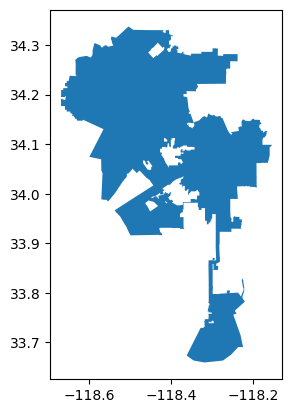

In [33]:
LA.plot()

In [45]:
gpdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Latitude, df.Longtitude), crs={'init' :'epsg:4326'})

/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [38]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 26.2 MB/s eta 0:00:00


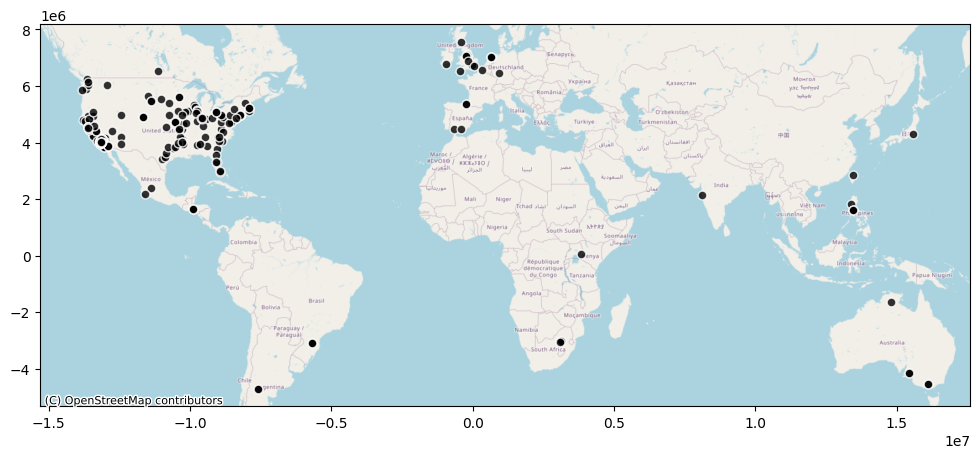

In [46]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 10))
gpdf.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="black",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [47]:
gpd_LA = gpd.sjoin(gpdf, LA, how="inner", op="intersects")

gpd_LA.head(2)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-47-c39e63723524>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  gpd_LA = gpd.sjoin(gpdf, LA, how="inner", op="intersects")


,Unnamed: 0,Death Date,Death Year,Victim Name,Death Location,Victim Age,Victim Gender,Cause of Death,Victim Race,Agency,...,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
2,2,Mar.17,2023,Kyle Mcarthur Jones,4410 S Figueroa St,48,Male,Unknown,Black,LAPD,...,-118.668178,355412804,relation,207359,34.053691,-118.242766,"Los Angeles, Los Angeles County, CAL Fire Cont...",boundary,administrative,1.083805
4,4,Mar.16,2023,Jeffrey Zaffarullah Faiz,3644 Military Avenue,61,Male,Unknown,White,LAPD,...,-118.668178,355412804,relation,207359,34.053691,-118.242766,"Los Angeles, Los Angeles County, CAL Fire Cont...",boundary,administrative,1.083805


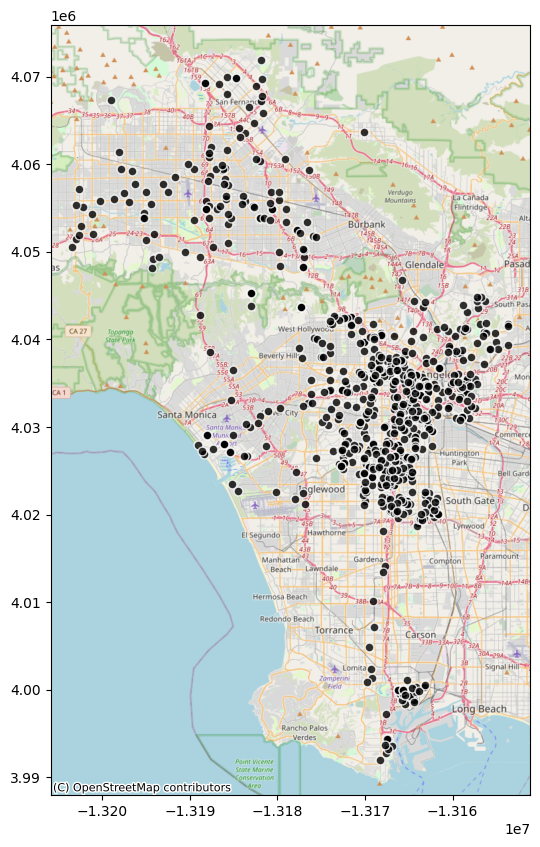

In [49]:
fig, ax = plt.subplots(figsize=(12, 10))
gpd_LA.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="black",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)